In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import merged.csv from /raw_data

In [2]:
original_dataset = pd.read_csv('merged.csv', low_memory=False)

In [3]:
dataset = pd.read_csv('merged.csv', low_memory=False)
dataset.head()

,subject_id,hourly_bin,temp,WBC,HeartRate,RR
0,3,2101-10-21 02:00:00,36.200001,NaN,NaN,18.0
1,3,2101-10-21 03:00:00,36.500000,NaN,NaN,18.0
2,3,2101-10-21 07:00:00,36.900002,NaN,97.0,18.0
3,3,2101-10-21 14:00:00,37.099998,NaN,NaN,18.0
4,3,2101-10-21 16:00:00,37.400002,NaN,NaN,18.0


## Check the types of each column

In [4]:
dataset.dtypes

subject_id      int64
hourly_bin     object
temp          float64
WBC            object
HeartRate     float64
RR            float64
dtype: object

Convert the hourly_bin column to datetime

In [5]:
dataset['hourly_bin'] = pd.to_datetime(dataset['hourly_bin'])
dataset.dtypes

subject_id             int64
hourly_bin    datetime64[ns]
temp                 float64
WBC                   object
HeartRate            float64
RR                   float64
dtype: object

## Cleaning the WBC column

Clean out the invalid values of the WBC columns

In [6]:
dataset['WBC'] = \
dataset['WBC'].replace({'no data': np.nan, '<0.1*': np.nan, '<0.1': np.nan, '.': np.nan, 'ERROR': np.nan}).astype(float)


In [7]:
dataset.drop(columns = ['subject_id']).describe()

,temp,WBC,HeartRate,RR
count,339348.000000,101304.000000,603990.000000,496951.000000
mean,37.062857,12.722638,94.785144,19.089667
std,2.296956,11.424472,27.990987,19.869742
min,-3.000000,0.000000,0.000000,0.000000
25%,36.500000,8.100000,75.000000,15.000000
50%,37.055599,11.200000,88.000000,18.000000
75%,37.599998,15.300000,107.000000,22.000000
max,209.000000,1935.000000,287.000000,999.000000


## Temperature Column Cleaning

Check the distribution of temperatures

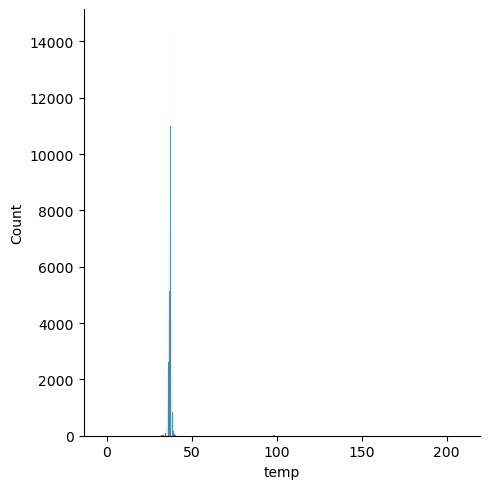

In [8]:
sns.displot(dataset, x = 'temp')
plt.show()

26C is a demarcation between normal temperature and invalid values

In [9]:
dataset[dataset['temp'] < 26]['temp'].sort_values()

311549    -3.000000
309436    -2.000000
339280     0.000000
168320     0.000000
170615     0.000000
            ...    
310577    24.700000
317570    25.000000
106132    25.444401
316265    25.600000
326964    25.700000
Name: temp, Length: 301, dtype: float64

Any body temperature above 47C has the similarities to a fahrenheit unit of measurement.

In [10]:
fahrenheit = dataset[dataset['temp'] >= 47]
fahrenheit

,subject_id,hourly_bin,temp,WBC,HeartRate,RR
1860,188,2161-12-09 18:00:00,96.5,NaN,NaN,NaN
20419,2090,2137-12-03 16:00:00,97.6,NaN,NaN,NaN
41304,4313,2176-01-09 16:00:00,100.1,NaN,NaN,NaN
67012,6958,2196-09-21 23:00:00,99.0,NaN,NaN,NaN
73848,7676,2119-10-31 20:00:00,100.6,NaN,NaN,NaN
...,...,...,...,...,...,...
339156,99785,2122-10-12 15:00:00,100.6,NaN,NaN,NaN
339157,99785,2122-10-12 17:00:00,101.6,NaN,NaN,NaN
339158,99785,2122-10-12 21:00:00,99.1,NaN,NaN,NaN
339253,99836,2116-07-15 07:00:00,95.8,NaN,NaN,NaN


In [11]:
fahrenheit['temp'].sort_values()

317212     80.0
319707     94.0
338868     95.0
263291     95.2
325949     95.2
          ...  
326532    101.0
312509    101.0
308208    101.1
339157    101.6
310017    209.0
Name: temp, Length: 307, dtype: float64

Convert fahrenheit to Celsius.

In [12]:
dataset['temp'] = (dataset['temp'].apply(lambda x: (x-32)*(5/9) if x >= 47 else x))

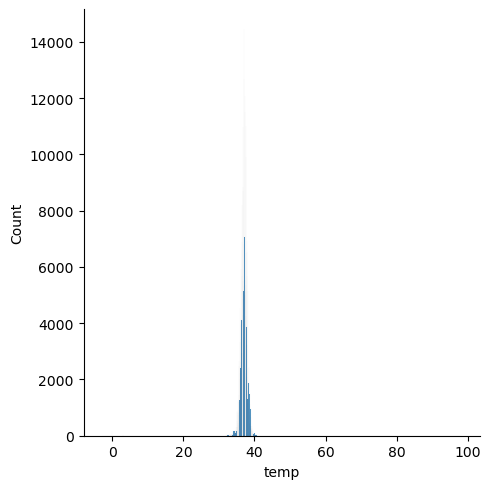

In [13]:
sns.displot(dataset, x = 'temp')
plt.show()

This body temperature is still abnormally high after conversion, and there is no other information about the validity of the value, thus we decided to drop it.

In [14]:
dataset[dataset['temp'] > 47]

,subject_id,hourly_bin,temp,WBC,HeartRate,RR
310017,45797,2199-09-13 09:00:00,98.333333,NaN,NaN,NaN


In [15]:
dataset = dataset.drop([310017, 310018])

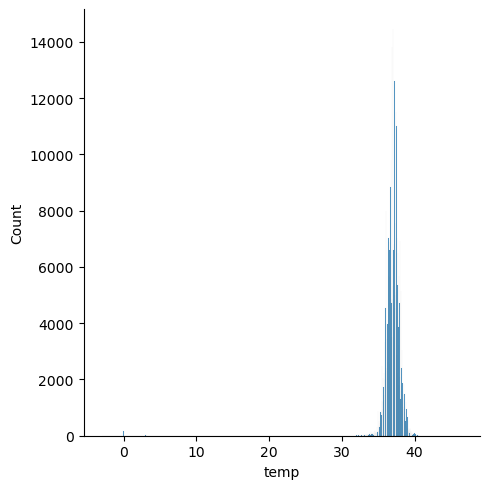

In [16]:
sns.displot(dataset, x = 'temp')
plt.show()

Zoom in on the abnormally low values.

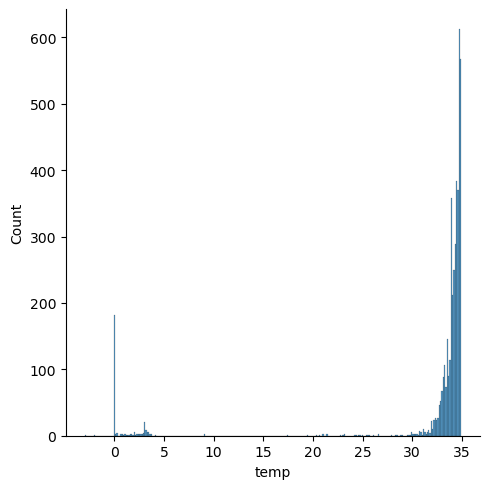

In [17]:
sns.displot(dataset[dataset['temp'] < 35], x = 'temp')
plt.show()

Replace 0 and temperatures below 20 with nan values since it is impossible for a living patient to reach that body temperature.

In [18]:
dataset['temp'] = dataset['temp'].replace({0: np.nan})


In [19]:
dataset['temp'] = (dataset['temp'].apply(lambda x: np.nan if x < 20 else x))

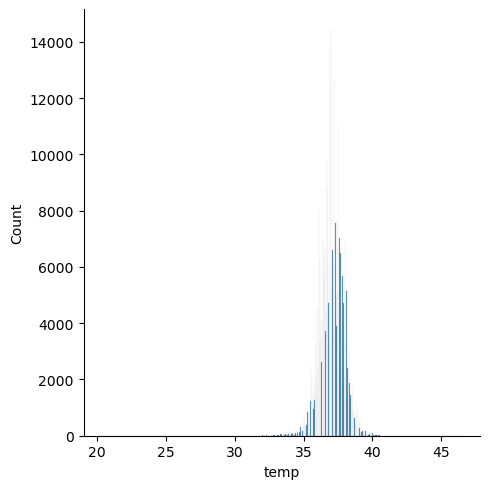

In [20]:
sns.displot(dataset, x = 'temp')
plt.show()

In [21]:
dataset[dataset['temp'] < 30]

,subject_id,hourly_bin,temp,WBC,HeartRate,RR
540,63,2169-01-07 12:00:00,21.055599,NaN,100.0,22.0
8674,874,2109-02-12 10:00:00,29.799999,NaN,NaN,11.0
43834,4587,2149-12-05 03:00:00,22.799999,NaN,NaN,NaN
54295,5666,2151-01-13 13:00:00,29.722200,7.8,65.0,NaN
106132,11108,2166-03-07 05:00:00,25.444401,11.6,NaN,NaN
118572,12425,2199-08-14 12:00:00,23.200001,NaN,97.0,24.0
139947,14709,2183-02-13 07:00:00,29.600000,NaN,89.0,33.0
157247,16535,2167-06-10 08:00:00,23.000000,NaN,85.0,NaN
193105,20356,2155-09-12 16:00:00,26.666700,NaN,60.0,NaN
221821,23402,2200-03-29 08:00:00,29.944401,9.4,NaN,16.0


In [22]:
dataset.describe().drop(columns = ['subject_id'])

,temp,WBC,HeartRate,RR
count,339063.000000,101304.000000,603990.000000,496951.000000
mean,37.037018,12.722638,94.785144,19.089667
std,0.858342,11.424472,27.990987,19.869742
min,20.333300,0.000000,0.000000,0.000000
25%,36.500000,8.100000,75.000000,15.000000
50%,37.055599,11.200000,88.000000,18.000000
75%,37.599998,15.300000,107.000000,22.000000
max,46.500000,1935.000000,287.000000,999.000000


## WBC
The unit used in this dataset is K/uL (thousands per cubic milliliter of blood). The normal range is 4.5 - 11 K/uL. (https://www.mountsinai.org/health-library/tests/wbc-count) 

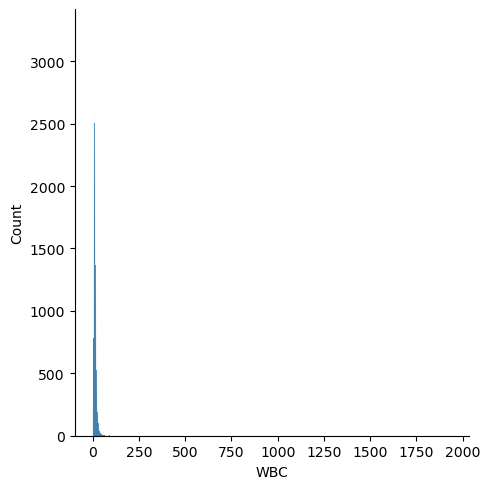

In [23]:
sns.displot(dataset, x = 'WBC')
plt.show()

In [24]:
dataset[dataset['WBC'] >= 500]

,subject_id,hourly_bin,temp,WBC,HeartRate,RR
133380,14038,2137-10-25 00:00:00,36.388901,528.0,101.0,20.0
355544,6094,2113-08-06 02:00:00,NaN,502.6,NaN,NaN
355545,6094,2113-08-06 13:00:00,NaN,506.3,NaN,NaN
375996,14038,2137-11-24 20:00:00,NaN,665.6,NaN,NaN
375997,14038,2137-11-25 04:00:00,NaN,605.0,NaN,NaN
409410,27048,2140-01-31 13:00:00,NaN,1935.0,152.0,NaN


Cleaning wasn't carried out because high WBC is possible for patients with serious conditions such as leukocytosis.

## Respiration Rate

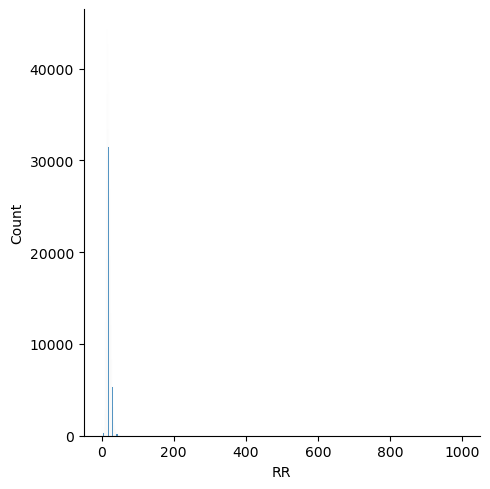

In [25]:
sns.displot(dataset, x = 'RR')
plt.show()

In [26]:
dataset[dataset['RR'] > 100]['RR'].sort_values()

906867     102.0
1019289    107.0
400003     999.0
990140     999.0
990141     999.0
           ...  
931606     999.0
931607     999.0
944198     999.0
928705     999.0
1051390    999.0
Name: RR, Length: 189, dtype: float64

Only replaced 999 and 0 values with nan because it is possible that RR is around 100 due to a procedure called jet ventilation.

In [27]:
dataset['RR'] = dataset['RR'].replace({999: np.nan})

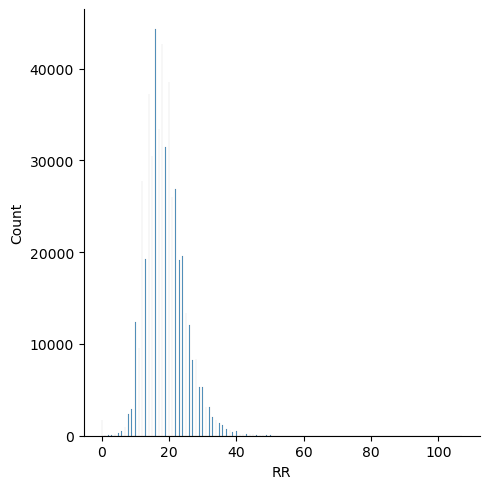

In [28]:
sns.displot(dataset, x = 'RR')
plt.show()

In [29]:
dataset['RR'] = dataset['RR'].replace({0: np.nan})

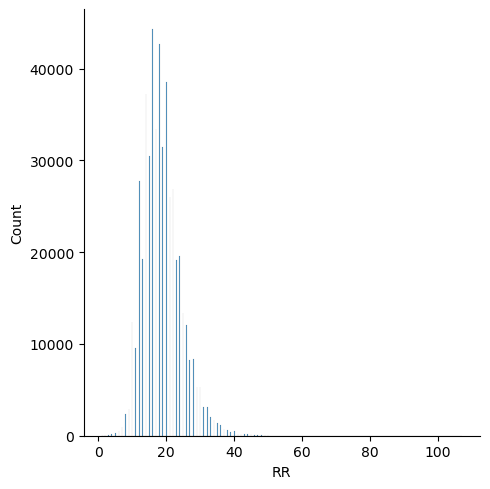

In [30]:
sns.displot(dataset, x = 'RR')
plt.show()

### High-Frequency Jet Ventilation

In [31]:
dataset[dataset['RR'] > 100]

,subject_id,hourly_bin,temp,WBC,HeartRate,RR
906867,7156,2122-01-31 13:00:00,NaN,NaN,NaN,102.0
1019289,25475,2124-10-21 14:00:00,NaN,NaN,NaN,107.0


In [32]:
dataset.isna().mean()

subject_id    0.000000
hourly_bin    0.000000
temp          0.680766
WBC           0.904620
HeartRate     0.431333
RR            0.533913
dtype: float64

In [33]:
dataset.describe()

,subject_id,temp,WBC,HeartRate,RR
count,1.062115e+06,339063.000000,101304.000000,603990.000000,495038.000000
mean,1.778033e+04,37.037018,12.722638,94.785144,18.786065
std,1.336591e+04,0.858342,11.424472,27.990987,5.678493
min,2.000000e+00,20.333300,0.000000,0.000000,1.000000
25%,8.246000e+03,36.500000,8.100000,75.000000,15.000000
50%,1.662300e+04,37.055599,11.200000,88.000000,18.000000
75%,2.502000e+04,37.599998,15.300000,107.000000,22.000000
max,9.998200e+04,46.500000,1935.000000,287.000000,107.000000


In [34]:
dataset['WBC'] = dataset['WBC'].replace({0: np.nan})

In [35]:
dataset['HeartRate'] = dataset['HeartRate'].replace({0: np.nan})

### Check the distribution of the values once again. We can see it follows a pretty normal pattern now.

In [36]:
dataset.describe()

,subject_id,temp,WBC,HeartRate,RR
count,1.062115e+06,339063.000000,101302.000000,603834.000000,495038.000000
mean,1.778033e+04,37.037018,12.722889,94.809631,18.786065
std,1.336591e+04,0.858342,11.424445,27.953106,5.678493
min,2.000000e+00,20.333300,0.100000,0.150000,1.000000
25%,8.246000e+03,36.500000,8.100000,75.000000,15.000000
50%,1.662300e+04,37.055599,11.200000,88.000000,18.000000
75%,2.502000e+04,37.599998,15.300000,108.000000,22.000000
max,9.998200e+04,46.500000,1935.000000,287.000000,107.000000


## Merge with demographics data

In [37]:
import psycopg2
params = {
    'dbname': 'mimic',
    'user': 'jerryzhang',
    'host': 'localhost',
    'port': 5432
}


conn = psycopg2.connect(**params)

In [38]:
query_demo = """SELECT 
    p.subject_id,
    a.hadm_id,
    p.gender,
    Adjusted_age.age, 
    a.ethnicity,
    a.religion,
    a.marital_status,
    a.insurance
FROM 
    mimiciii.patients p
INNER JOIN 
    mimiciii.admissions a 
ON 
    p.subject_id = a.subject_id
LEFT JOIN 
    Adjusted_age 
ON 
    p.subject_id = Adjusted_age.subject_id;
"""

In [39]:
demographics = pd.read_sql_query(query_demo, conn)

/Users/jerryzhang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [40]:
dataset.merge(demographics, how = 'left', on = 'subject_id').drop(columns = ['hadm_id', 'religion', 'marital_status', 'insurance'])

,subject_id,hourly_bin,temp,WBC,HeartRate,RR,gender,age,ethnicity
0,3,2101-10-21 02:00:00,36.200001,NaN,NaN,18.0,M,76.0,WHITE
1,3,2101-10-21 03:00:00,36.500000,NaN,NaN,18.0,M,76.0,WHITE
2,3,2101-10-21 07:00:00,36.900002,NaN,97.0,18.0,M,76.0,WHITE
3,3,2101-10-21 14:00:00,37.099998,NaN,NaN,18.0,M,76.0,WHITE
4,3,2101-10-21 16:00:00,37.400002,NaN,NaN,18.0,M,76.0,WHITE
...,...,...,...,...,...,...,...,...,...
1564861,32810,2100-09-19 13:00:00,NaN,NaN,NaN,30.0,M,22.0,WHITE
1564862,32810,2100-09-19 14:00:00,NaN,NaN,NaN,30.0,M,22.0,WHITE
1564863,32810,2100-09-19 14:00:00,NaN,NaN,NaN,30.0,M,22.0,WHITE
1564864,32810,2100-09-19 15:00:00,NaN,NaN,NaN,30.0,M,22.0,WHITE


In [41]:
new_dataset = dataset.merge(demographics, how = 'left', on = 'subject_id').drop(columns = ['hadm_id', 'religion', 'marital_status', 'insurance'])
new_dataset

,subject_id,hourly_bin,temp,WBC,HeartRate,RR,gender,age,ethnicity
0,3,2101-10-21 02:00:00,36.200001,NaN,NaN,18.0,M,76.0,WHITE
1,3,2101-10-21 03:00:00,36.500000,NaN,NaN,18.0,M,76.0,WHITE
2,3,2101-10-21 07:00:00,36.900002,NaN,97.0,18.0,M,76.0,WHITE
3,3,2101-10-21 14:00:00,37.099998,NaN,NaN,18.0,M,76.0,WHITE
4,3,2101-10-21 16:00:00,37.400002,NaN,NaN,18.0,M,76.0,WHITE
...,...,...,...,...,...,...,...,...,...
1564861,32810,2100-09-19 13:00:00,NaN,NaN,NaN,30.0,M,22.0,WHITE
1564862,32810,2100-09-19 14:00:00,NaN,NaN,NaN,30.0,M,22.0,WHITE
1564863,32810,2100-09-19 14:00:00,NaN,NaN,NaN,30.0,M,22.0,WHITE
1564864,32810,2100-09-19 15:00:00,NaN,NaN,NaN,30.0,M,22.0,WHITE
